In [1]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
import librosa
import scipy

22050


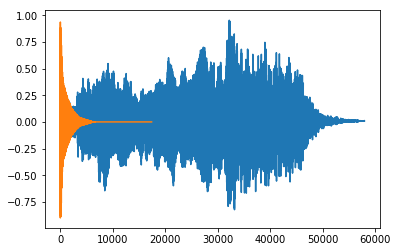

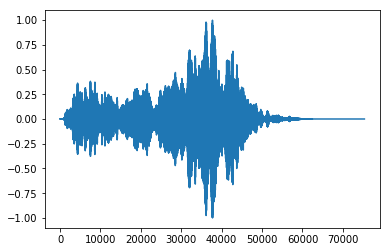

In [2]:
# Load the data and calculate the time of each sample
e_data, e_samplerate  = librosa.load('elefante.wav')
b_data, b_samplerate = librosa.load('Garrafa.wav')

print(e_samplerate)

r_data = np.convolve(e_data, b_data)
r_data /= np.max(np.abs(r_data),axis=0)


plt.plot(e_data)
plt.plot(b_data)
plt.show()
plt.plot(r_data)
librosa.output.write_wav('elefante_na_garrafa.wav', r_data, e_samplerate)

In [3]:
import IPython.display as ipd
ipd.Audio('elefante_na_garrafa.wav') # load a local WAV file

# Project Solution

## 1 Introduction

In [4]:
# Simulate recording of impulse response 
# h[k]: Real impulse response
# w[k]: White noise used to excite impulse response 
# n[k]: White measurement noise (var=0.01)
# r[k] = w[k] ∗ h[k] + n[k].
h, samplerate = librosa.load('Garrafa.wav')
num_samples = len(h)
num_samples = 0000

print(samplerate)
w = np.random.normal(0, 1, size=num_samples)

h /= np.max(np.abs(h),axis=0)


n_var=0.01
n = np.random.normal(0, np.sqrt(n_var), size=num_samples)
plt.plot(n)
plt.show()

r = scipy.signal.convolve(w, h) 
# r = r/sum(h)
# r /= np.max(np.abs(r),axis=0)
# r = r*(1/num_samples)
# r = r[num_samples-1:]

plt.plot(r)

print(np.var(n))
# plt.plot(r)

librosa.output.write_wav('r_simulation.wav', r, samplerate)
wavfile.write('r_simulation.wav', samplerate, r)

In [5]:
import IPython.display as ipd
ipd.Audio('r_simulation.wav') # load a local WAV file

In [6]:
def estimation_error(estimation, original):
    return np.sum((estimation - original)**2)/np.sum(original**2)

# print(estimation_error(r, h))

## 2 Correlation Estimator

22050


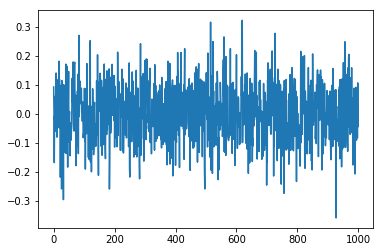

0.010106546723974808
0.011807726472830554
0.250404182545248


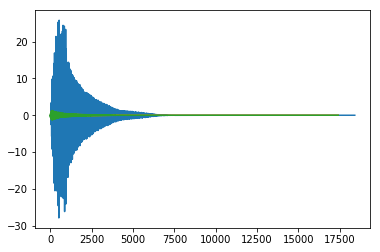

In [8]:
ro = scipy.signal.convolve(r, w[::-1])/len(w)
# ro = ro/np.max(np.abs(ro),axis=0)
ro = ro[num_samples-1:num_samples+len(h)-1]
plt.plot(h)
plt.plot(ro)
print(np.var(ro))
wavfile.write('ro.wav', samplerate, ro)
ipd.Audio('ro.wav') # load a local WAV file
print(estimation_error(ro, h))